In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
x1 = np.random.normal(loc = 1.5, scale = .7, size = 200)
y1 = np.random.normal(loc = 1, scale = 1 , size = 200)


x2 = np.random.normal(loc = 4, scale = .7 , size = 200)
y2 = np.random.normal(loc = 4.5, scale = 1, size = 200)

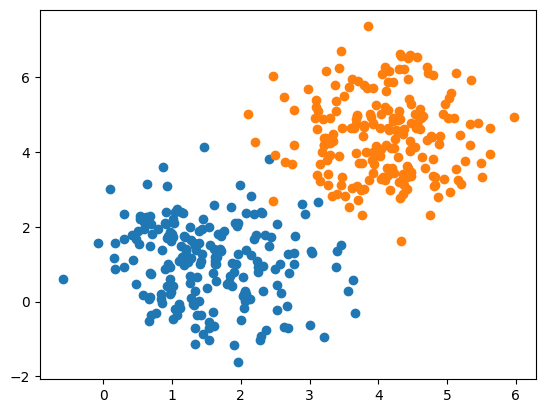

In [56]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)

plt.show()


In [57]:
A = np.stack((x1, y1), axis = 1)
B = np.stack((x2, y2), axis = 1)

In [58]:
testx = np.random.normal(loc = 3, scale = 1 , size = 20)
testy = np.random.normal(loc = 3, scale = 1 , size = 20)

In [ ]:
test = np.stack((testx, testy), axis = 1)
test

In [60]:
A.shape, B.shape

((200, 2), (200, 2))

In [61]:
AB = np.concatenate((A, B))
AB.shape

(400, 2)

In [62]:
x = AB.T[0]
y = AB.T[1]

In [63]:
x.mean() , y.mean()

(np.float64(2.809240056398161), np.float64(2.7452735551822576))

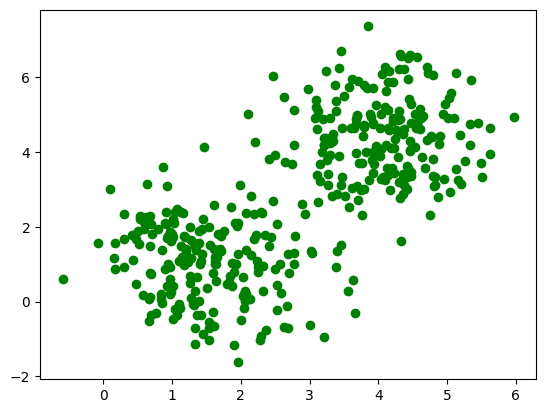

In [64]:
plt.scatter(AB.T[0], AB.T[1], color = "green")
plt.show()

In [65]:
from scipy.linalg import svd

In [66]:
U,S, VT = svd(AB)

In [67]:
U.shape, S.shape

((400, 400), (2,))

In [68]:
S

array([90.71273198, 19.71095507])

In [69]:
sigma = np.zeros((AB.shape))

In [70]:
for i in range(len(S)):
    sigma[i,i] = S[i]

In [71]:
v1 = VT[0] * 10 
v2 = VT[1] * 10

In [72]:
s1 = S[0]
s2 = S[1]

In [73]:
np.inner(v1,v2)

np.float64(0.0)

In [74]:
np.linalg.norm(v1)


np.float64(10.0)

In [75]:
np.linalg.norm(v2)

np.float64(10.0)

In [76]:
# start point set on mean of data
# start = np.array([0,0])
start = np.array([x.mean(),y.mean()])


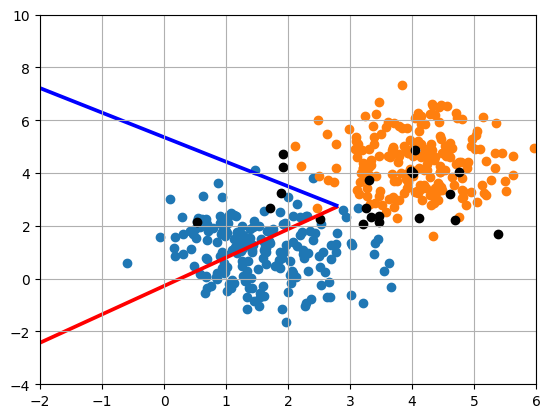

In [77]:
ax = plt.axes()
ax.set_xlim(-2,6)
ax.set_ylim(-4,10)
ax.grid(True)

ax.scatter(x1,y1)
ax.scatter(x2,y2)
ax.scatter(testx, testy, color="black")

ax.quiver(*start,*v1,scale=1,angles = 'xy', scale_units = 'xy',color = 'red')
ax.quiver(*start,*v2,scale=1,angles = 'xy', scale_units = 'xy',color = 'blue')

plt.show()

In [78]:
AB_V = np.matmul (AB,VT.T)
A_V = np.matmul(A, VT.T)
B_V = np.matmul(B, VT.T)
test_V = np.matmul(test, VT.T)

In [ ]:
test_V

In [ ]:
test_V.T[0] > -5


array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True])

In [87]:
test_V[test_V.T[0] > -5]

array([[-3.93435815, -1.08305821],
       [-3.66822448,  0.84032985],
       [-3.69747046, -0.94827564],
       [-3.12229104,  0.56843919],
       [-4.77822122,  1.81444933],
       [-3.97874182, -0.85443994],
       [-4.50046423, -1.43845518],
       [-4.39394213,  1.4722458 ],
       [-4.1734452 , -0.57085812],
       [-3.36011428, -0.2998562 ],
       [-4.09538701, -0.91923823],
       [-4.99599466,  0.13573805],
       [-4.82725436, -1.91047931],
       [-1.94186888,  1.07646999],
       [-4.91331142, -2.78255487]])

In [ ]:
test_V[test_V.T[0] > -5]

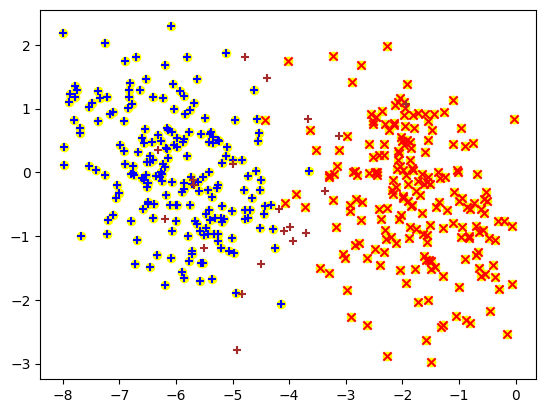

In [91]:
plt.scatter(AB_V.T[0], AB_V.T[1], color = "yellow")
plt.scatter(A_V.T[0], A_V.T[1],  marker = "x", color = "red")
plt.scatter(B_V.T[0], B_V.T[1], marker = "+", color = "blue")
plt.scatter(test_V.T[0], test_V.T[1], marker = "+", color = "brown")